<a href="https://colab.research.google.com/github/muschi-lab/bayesian-climate-tutorial/blob/main/Bayes_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 09: Introduction to Bayesian Statistics

##  Fundamentals of Bayesian Stats | prior distribution, likelihood, posterior distribution | Bayes' rule | Markov Chain Monte Carlo (MCMC) |

---

This lecture is an entry point to Bayesian statistics and its applications in climate data science. It covers the fundamental concepts behind the Bayesian approach to probability and highlights its advantages over frequentist (i.e. classical) methods. The tutorial will begin by introducing Bayes' rule through an idealized binomial problem. It will then apply these principles to a more complex physical data set, demonstrating the key advantages of using Bayesian analysis for sparse and error-prone climate and environmental data.

---
This tutorial is written almost entirely using our familiar Python toolkits: NumPy (https://numpy.org/), Pandas (https://pypi.org/project/pandas/), Matplotlib (https://matplotlib.org/), and Scipy.signal (https://scipy.org/).

By the end of this lecture + associated problem set, the aim is for you to be capable of designing your own Bayesian statistical models in Python.

---

Instructor: Francesco Muschitiello (fm476), Mar 2025.

**Generative AI Use Statement:**
Parts of this tutorial's materials were created with the support of Gemini and ChatGPT.

---


## Import Main Libraries

In [2]:
# For numerical computations and array operations
import numpy as np

# For data manipulation and analysis using DataFrames
import pandas as pd

# For creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# For statistical distributions and functions
import scipy.stats as stats

## And, let's mount our Google Drive, as we are loading external files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Demo 1: A Gentle Introduction to Bayesian Analysis

### "*Probabilities will help us plan for climate change. Without estimates, engineers and planners will have to delay decisions or take a gamble*" (Pittock et al., 2001)

In climate science, uncertainty is inherent. Because of the wide range of uncertainties surrounding future projections (e.g. no observations and no straightforward way of assessing the predictive skill of today's climate models), estimates of future changes are often expressed as a percentage or a range of possibilities.

These limitations make Bayesian Analysis ideal for framing physical problems and quantifying climate change in terms of probability over conventional statistical methods. This is evident in the exponential growth of studies applying Bayesian Stats within the field of Earth and Environmental Science.

![memory](https://drive.google.com/uc?export=view&id=11Eg9QyMfL8gzbXqSSzcKIJwgBoJm-OFN)
*Proportion of scientific publications (203,413 documents) applying Bayesian Statistics by subject (data source: Scopus)*

![memory](https://drive.google.com/uc?export=view&id=1F5PRwSfyLodJ3VPgmRN9wYEF1_UxMoEy)
*Number of scientific publications applying Bayesian Statistics by year (data source: Scopus)*


## **What is Bayesian Statistics?**
**Bayesian statistics is a way of updating our beliefs based on new evidence**. Imagine you start with an initial guess or belief (called a *prior*), then as you collect more evidence, you adjust that belief to make it more accurate. This updated belief is called the *posterior*.

The key idea is that we rarely know anything with full certainty, so we refine our understanding as new information comes in. It’s like being open-minded: you begin with an idea, then change it as you get new facts. In a sense, this approach **reflects the process of learning**. In fact, it forms a foundational framework for many areas of machine learning.

Bayesian statistics is particularly useful for Earth Science problems, which often involve dealing with a small number of observations (i.e. where traditional frequentist statistics (i.e. classical statistics you are familiar with from Part 1A and 1B)  might struggle to fit a stable statistical model to the data). More importantly, unlike traditional methods that focus on a single estimate, Bayesian statistics maintains a range of possible values, reflecting our uncertainty.

---

## **Frequentist (i.e. Classical) vs Bayesian Statistics**


The Frequentist vs Bayesian debate has a long history and the battle
is still going on. To make a very long story short, from a practical point of view **Bayesian is better suited to handle “dirty” data (i.e. small and noisy)**.

But the truth is that Bayesian models offer several advantages over frequentist approaches, in particular in terms of uncertainty quantification, flexibility, and the ability to incorporate prior information. More specifically:

1. *Uncertainty Quantification*
  - Bayesian models provide posterior distributions for model parameters rather than point estimates, which allow for a better quantification of uncertainty and interpretability of the results.
2. *Incorporation of Prior Knowledge*
  - Bayesian models allow the inclusion of prior knowledge, which is useful when data is limited or when there is substantial domain knowledge to inform the model (this is often the case in physical sciences).
3. *Robustness to Small or Noisy Data*
  - Bayesian methods perform well even with small datasets, as the priors can stabilize the estimation of the parameters, whereas the frequentist approach may struggle to fit a stable model to the data in the presence of noise or large errors.

*Trade-offs*
  - While Bayesian models have numerous benefits, they can be computationally intensive, especially for large datasets or complex models. Additionally, results can be sensitive to the choice of priors, so one must be careful justifying their selection.


| Feature | Frequentist | Bayesian |
|---|---|---|
| **Probability** | Objective (based solely on frequency of data) | Subjective (include both observed data and prior belief) |
| **Parameters** | Fixed (estimated as best as possible using the data) | Random (estimated from prior distributions before observing any data) |
| **Inference Method** | Likelihood Maximization (probability of observing the data given a set of parameters) | Bayes' Theorem (update prior beliefs with new data) |
| **Estimates** | Point Estimates | Credible Intervals |
| **Prior Knowledge** | No | Yes |



# Demo 2: A Simple Binomial Problem
## **Determining the Bias of a Coin Using Bayes' Theorem**

<img src="https://drive.google.com/uc?export=view&id=1CK2ZFJwf89gzzvkVuIRfOKfyZlMgyLhP" width="300" height="300">

In the following demo, we will build on the example given in *Lecture04* that introduced Monte Carlo methods, where you tested whether a coin was 'rigged' based on the results of a number of flips.

Suppose we have a coin and want to estimate its bias. Initially, we assume that the the coin is fair. We can't confidently estimate the coin's bias without data, so we begin with an assumption about its fairness. If you’re determined to find the true bias, you could flip the coin thousands (or even millions) of times. But for practical reasons, we rely on a limited number of flips.

Bayes' theorem allows us to update (and improve!) our prior belief about the fairness of the coin based on the observed data, i.e. in our case the coin flip outcomes.

---

### Bayes' Theorem

$$
P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}
$$

Where:
- ($H$): Hypothesis (e.g., the coin is fair)
- ($D$): Observed data (e.g., coin flip outcomes)


### Ingredients of Bayes' Theorem
1. **Prior $P(H)$**: Represents our initial belief about the hypothesis before analyzing the data (e.g., assuming the coin is fair).
2. **Likelihood $P(D|H)$**: The probability of observing the data given the hypothesis (e.g. the probability of observing $n$ heads assuming the coin is fair).
3. **Evidence $P(D)$**: A normalization constant that ensures the posterior is a valid probability distribution. It is computed as:
   $$
   P(D) = \sum_H P(D|H)P(H)
   $$
4. **Posterior $P(H|D)$**: Represents our updated belief about the hypothesis in light of the observed data (e.g., the probability that the coin is biased toward heads).

---

### Bayesian Updating

If we view the prior as the initial information we have, represented by a probability density function, then Bayes’ theorem tells us how to update that information after observing some data: this is the posterior probability density function.

For example, when estimating the bias of a coin, the prior represents our initial assumption about the coin’s fairness (e.g., a 50% chance of heads). After flipping the coin several times and observing the outcomes, Bayes' theorem allows us to update our prior to reflect the observed data, resulting in the posterior probability.

Let's perform a simulation of a coin-tossing experiment similar to that presented in *Lecture04*. This provides the data/observations that we will be analyzing. Let's assume we toss the coin 10 times and observe the outcomes. In this case, we get 7 heads out of 10 flips.

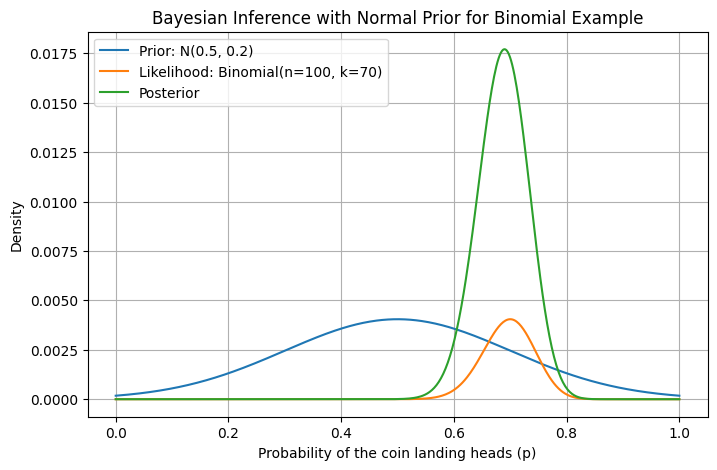

In [ ]:
###############################################################################
# The code below simulates a coin toss experiment to illustrate Bayesian updating.
# We'll assume a certain number of flips and observed heads, then use Bayes'
# theorem to update our prior belief about the coin's bias.
###############################################################################

# Data
n = 10  # Number of coin flips
k = 7  # Number of heads

###############################################################################
# We start with a normal prior distribution for the coin's bias (p),
# centered at 0.5 (representing a fair coin) with a standard deviation of 0.2.
# This reflects our initial belief that the coin is likely fair, but allows for
# some uncertainty.
###############################################################################

# Prior: Normal(0.5, 0.2)
mu_prior = 0.5  # Mean of the prior
sigma_prior = 0.2  # Standard deviation of the prior

# Probability range for p
p = np.linspace(0, 1, 500)

###############################################################################
# The likelihood function represents the probability of observing the data
# (k heads in n flips) given a specific value of the coin's bias (p). We use
# the binomial distro to model the likelihood, i.e. appropriate for binary outcomes.
###############################################################################

# Likelihood: Binomial(k, n, p)
likelihood = stats.binom.pmf(k, n, p)

# Prior PDF (Normal distribution, truncated to [0,1])
prior_pdf = stats.norm.pdf(p, mu_prior, sigma_prior)
prior_pdf = prior_pdf / np.sum(prior_pdf)  # Normalize to ensure it sums to 1 over [0,1]

###############################################################################
# Now, we update our prior belief using the observed data and Bayes' theorem.
###############################################################################

# Posterior (Bayesian updating)
posterior_unnormalized = likelihood * prior_pdf # Bayes' theorem
posterior_pdf = posterior_unnormalized / np.sum(posterior_unnormalized)  # Normalization

##############################################################################
# We'll visualize the prior, likelihood, and posterior distributions to see how
# our belief about the coin's bias changes after observing the data.
###############################################################################

# Visualization
plt.figure(figsize=(8, 5))
plt.plot(p, prior_pdf, label=f"Prior: N({mu_prior}, {sigma_prior})", linestyle="solid")
plt.plot(p, likelihood * max(prior_pdf) / max(likelihood), label=f"Likelihood: Binomial(n={n}, k={k})", linestyle="solid")
plt.plot(p, posterior_pdf, label="Posterior", linestyle="solid")

plt.title("Bayesian Inference with Normal Prior for Binomial Example")
plt.xlabel("Probability of the coin landing heads (p)")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

Mean of the posterior distribution: 0.6865
95% Credible Interval for the coin's bias (p): 0.5952 to 0.7695


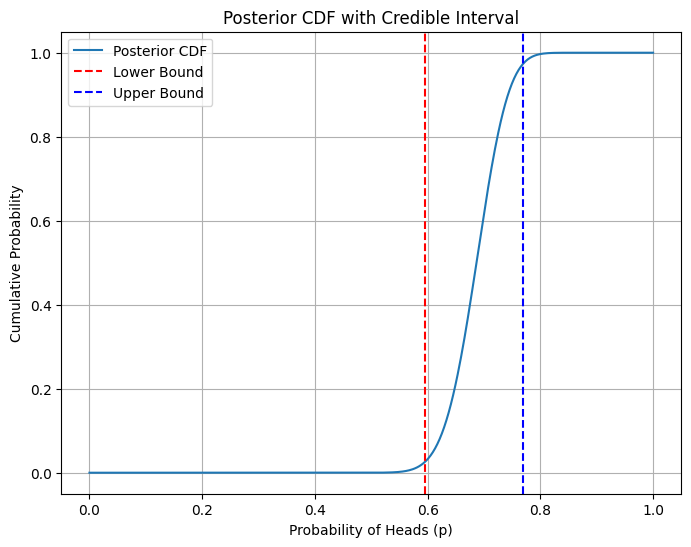

In [ ]:
# Calculate and print the mean of the posterior distribution
posterior_mean = np.sum(p * posterior_pdf) / np.sum(posterior_pdf)

# Calculate the cumulative distribution function (CDF) of the posterior PDF
posterior_cdf = np.cumsum(posterior_pdf) / np.sum(posterior_pdf)
# The CDF represents the probability of heads being less than or equal to a specific
# value and we use it here to estimate credibility intervals of the posterior.

# Define the credible level (e.g., 95%)
credibility_level = 0.95

# Function to find the credible interval
def credible_interval(p, cdf, level=0.95):
    lower_index = np.abs(cdf - (1 - level) / 2).argmin()  # Lower bound
    upper_index = np.abs(cdf - (1 + level) / 2).argmin()  # Upper bound
    return p[lower_index], p[upper_index]

# Get the credible interval
lower_bound, upper_bound = credible_interval(p, posterior_cdf, level=credibility_level)

# Output results
print(f"Mean of the posterior distribution: {posterior_mean:.4f}")
print(f"95% Credible Interval for the coin's bias (p): {lower_bound:.4f} to {upper_bound:.4f}")

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(p, posterior_cdf, label="Posterior CDF")

# Add vertical lines for the bounds of the credible interval
plt.axvline(lower_bound, color="red", linestyle="--", label="Lower Bound")
plt.axvline(upper_bound, color="blue", linestyle="--", label="Upper Bound")

# Set plot labels and title
plt.xlabel("Probability of Heads (p)")
plt.ylabel("Cumulative Probability")
plt.title("Posterior CDF with Credible Interval")
plt.legend()
plt.grid(True)
plt.show()

---
**_Aside_**: *Let's increase the number of coin flips ($n$) and number of heads ($k$) by an order of magnitude and observe how more observations affect the posterior results. How does the posterior mean and credible intervals change from the previous simulation, and why?*

---

### Intuition

If the coin were flipped many more times, the posterior would become more concentrated around the true bias of the coin. With only 10 flips, there is still considerable uncertainty, i.e. too few observations may not sufficiently inform the model thus making the posterior to resemble the prior. Regardless, the posterior provides a refined belief about probability of getting heads based on the observed data.

---

## **Takeaway**

**The posterior represents our updated belief about the coin’s bias after observing a certain number of flips**. The mean of the posterior represents the best estimate of the coin’s bias, that is a balance between our prior assumptions and the observations.

The binomial example above illustrates how Bayesian statistics allows us to incorporate prior information and progressively refine our understanding using data. This highlights how useful Bayesian analysis can be for uncertain and data-limited scenarios (i.e. ideal for climate and environmental studies!).

---


# Demo 3: Designing a Bayesian Model Using Real-World Data

In the context of climate science, incorporating prior knowledge in **Bayesian models allows for the construction of physically-grounded statistical models**. This is done by assigning priors around the model parameters that reflect known physical behaviors or limits. By contrast, frequentist models may lack this kind of flexibility, as they rely only on the observations. The shortcoming of this approach is that frequentist models may overfit the data or yield physically-implauisble solutions when data are scarce or noisy.

Let's evaluate these statements using some physical data. We will first apply a frequentist approach to a glaciological data set. We will evaluate its performance and potential drawbacks, and finally we will design a Bayesian model and assess whether it addresses the limitations of the frequentist approach.

## **Frequentist Model**

In this demo we will be using a data set recorded daily on a glacier in Spitzbergen during the summer of 1999 (Glac_Melt.csv – data courtesy of Prof. Gareth Rees). The columns of data are: 1. *Day*: the number of the day, counting from January 1st; 2. *AvTemp*: the average temperature for the day, and 3. *Melt*: the measured melt, in mm.

Glaciological theory holds that the amount of melt depends on three main sources of energy; short-wave (solar) radiation from the sun, sensible heat due to warm air temperatures, and latent heat, in the form of condensation or evaporation to/from the ice surface. We thus expect a strong relationship between melting and air temperature. This is the relationship that we aim at modeling today.



### Import and Plot Data
Let's create a scatterplot showing air temperature  against melting.

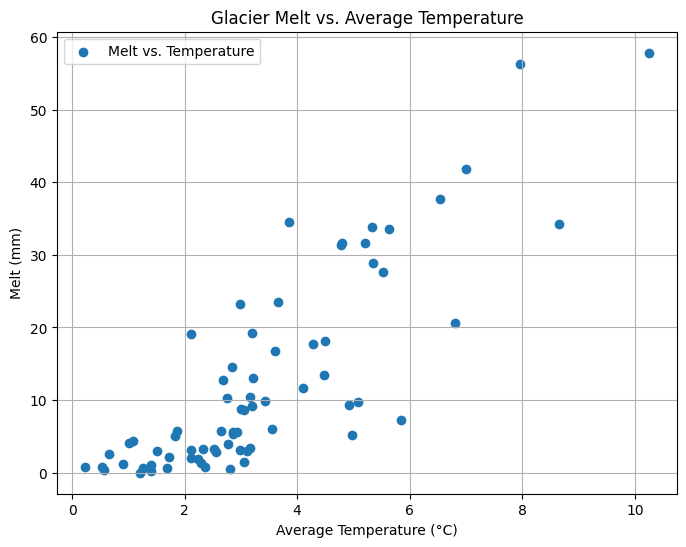

In [3]:
# Read the data from CSV file
file_path = '/content/drive/Shareddrives/GEOG-Paper_11_Envi_Data_Sci/L9/Glac_Melt.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Extract columns for plotting
day = data['Day']
av_temp = data['AvTemp']
melt = data['Melt']

# Plot Melt against Air Temperature
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(av_temp, melt, marker='o', label='Melt vs. Temperature')

plt.title('Glacier Melt vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Melt (mm)')
plt.legend()
plt.grid(True)
plt.show()

We can immediately observe there is a relationship between the two variables. The relationship is ever so slightly nonlinear. This could be explained by glaciers typically having a threshold temperature, above which they start melting faster and faster as temperature increases in response to various feedbacks (e.g. albedo feedback, thermal inertia etc.).

Let's start by fitting a nonlinear model to the data. For this tutorial we can use a simple quadratic model:

$$
Melt=β_0​ + β_1​⋅AvTemp+β_2​⋅AvTemp^2+ϵ
$$

Where:
- $Melt$ is the measured melt,
- $AvTemp$ is the average temperature,
- $β_0$​ is the intercept,
- $β_1$​ and $β_2$​ are the coefficients for the linear and quadratic terms of $AvTemp$, respectively,
- $ϵ$ is the error term, which represents the "measurement error" or "noise" in the data. This is assumed to come from a normal distribution with a mean of zero and variance $σ^2$.

### Fit a Polynomial Model
This is easily done by using the function `np.polyfit`, which fits a polynomial to our data. We provide as arguments x, y and the degree of the fitting model (in our case a second order polynomial).

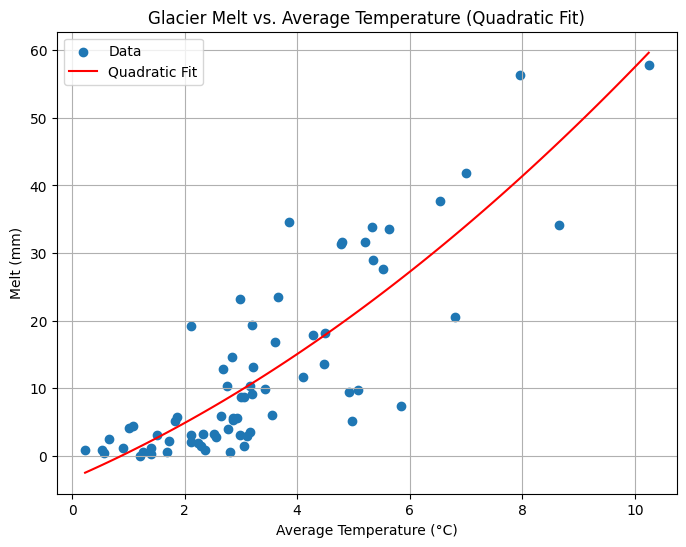

Coefficients:
  β_2 (Quadratic term coefficient): 0.2478
  β_1 (Linear term coefficient): 3.6130
  β_0 (Intercept): -3.3847


In [ ]:
# Fit a quadratic model (degree 2)
coefficients = np.polyfit(av_temp, melt, 2) # Note that 'np.polyfit' gives you the best-fit coefficients but doesn't provide their errors
# Unpack and save coefficients for later use
b2, b1, b0 = np.polyfit(av_temp, melt, 2)

# Get the fitted curve
curve_x = np.linspace(av_temp.min(), av_temp.max(), 100)  # 100 interpolated points along the x-axis for smooth curve
curve_y = np.polyval(coefficients, curve_x)

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(av_temp, melt, marker='o', label='Data')
plt.plot(curve_x, curve_y, color='red', label='Quadratic Fit')

plt.title('Glacier Melt vs. Average Temperature (Quadratic Fit)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Melt (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f"Coefficients:")
print(f"  β_2 (Quadratic term coefficient): {b2:.4f}")
print(f"  β_1 (Linear term coefficient): {b1:.4f}")
print(f"  β_0 (Intercept): {b0:.4f}")

### Check Residuals and $R^2$

Let's check the quality of the the model fit by plotting a histogram of the residuals, and calculate the coefficient of determination $R^2$ to quantify how well the model explains the variance in the data. You should be familiar with these concepts from *Lecture05*.

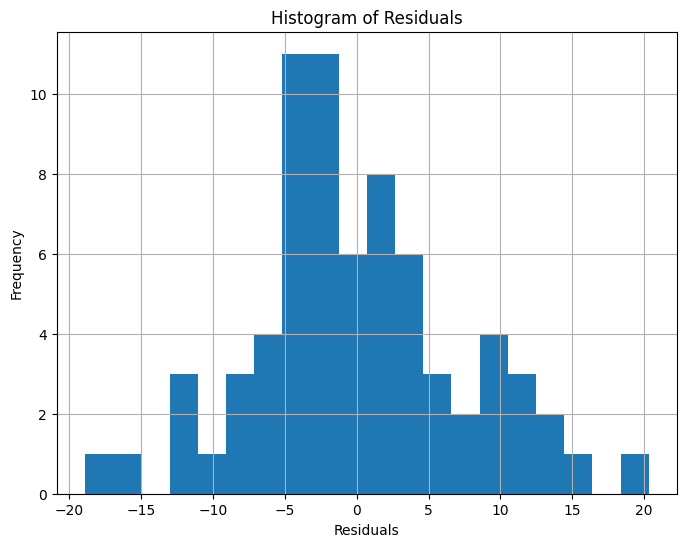

R-squared: 0.7076


In [ ]:
# for calculating R^2
from sklearn.metrics import r2_score # You have seen/used this package in Lecture05

# Calculate residuals
predicted_melt = np.polyval(coefficients, av_temp)  # Predicted melt values
residuals = melt - predicted_melt  # Difference between actual and predicted
r_squared = r2_score(melt, predicted_melt) # # Calculate R-squared

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)  # Adjust bins as needed
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# print R^2
print(f"R-squared: {r_squared:.4f}")

### Some Considerations

The residuals seem to be more or less normally distributed (ideally one should run a normality test to be sure), and the model explains quite a large portion of the total variance in the data ($R^2$ = 0.7). However, there is one big red flag in this statistical model.

**The intercept of the model is negative, which is physically impossible, i.e. we cannot have negative melting!** It is clear that the frequentist model, while doing a good job at fitting the observations, is not reflecting real-world physical processes. As mentioned before, this is due to the low number of observations in this data set and/or their inherent noise.

We could manually remove outliers or increase the number of data points in the hope that our model becomes more coherent with the laws of physics. Alternatively, rather than cherry-picking outliers and spend time and money on new measurements, we could **go Bayesian and design a model that reflects the physical relationship we want to model**. How cool is that?

## **Markov Chain Monte Carlo Algorithms**

Before we continue, we have to talk about Markov Chain Monte Carlo (MCMC). One of the most frequent applications of the MCMC algorithm (as in this tutorial) is sampling from the posterior distribution in Bayesian statistics. This is because the posterior can often be very complex and cannot be calculated analytically. In principle, however, MCMC may be used to sample from any integrable function. So, the aim of this algorithm is to **jump around in parameter space, but in a way that the probability to be at a point is proportional to the posterior distribution**.

The steps involved in MCMC sampling are the following:

- Initialization: start with an initial guess for the model parameters (in our case a value for each $β_0$​, $β_1$​, $β_2$​, and $ϵ$).

- Proposal Step: a new state is proposed by randomly adjusting the parameters from the previous iteration (i.e. suggests a new candidate set by adding Gaussian noise to the current parameters).

- Accept or Reject: jumping to this new state with a probability $p_{new}$/$p_{old}$, where $p$ is the posterior function, and $p$>1 means accepting the new state as well; otherwise, keep the previous state.

- Repeat: iterate thousands of times, building a chain of sampled states.

Effectively **the MCMC algorithm 'learns' from the past states and slowly converges towards areas of the parameter space that maximize the likelihood of the data**.

<img src="https://drive.google.com/uc?export=view&id=1pWu8OqYD6H2PBuqVMCRXTf80q8-HN42h" width="300" height="400">

*A MCMC sampler proposes new parameter values conditional on the last. The sampler then accepts (green) or rejects (red) the proposed parameter according to how well it explains the data (i.e. by calculating the likelihood of the data given the model parameters). Image from Hartig et al. (2011)*.

----

## **Bayesian Model**

Now it's time to design a Bayesian model for our glaciological data set. Let's take it step by step.

## 1. Define $x$ and $y$

First we define the dependent and independent variables ($x$ and $y$).

In [ ]:
# For your convenience we define the independent variable (AvTemp) and dependent variable (Melt) as generic x and y vectors
x = data["AvTemp"]
y = data["Melt"]

## 2. The Likelihood Function

For estimating parameters in a Bayesian analysis, we need to derive the likelihood function `likelihood()` for the model that we want to fit. As discussed in *Demo 2*, the likelihood $L$ is the probability (density) with which we would expect the observed data $y$ to occur conditional on the parameters $θ$ of the model, and is expressed as:

$$
L(θ | y) = P(y | θ)
$$

Given that our quadratic model $y =  a*x^2 + b*x + c + N(0, σ)$ takes the parameters a, b, c, and σ as an input, we have to return the probability of observing the melt data given values for these parameters. Therefore, the likelihood function for our model can be re-written as:

$$
L(a, b, c, σ | y) = P(y | a, b, c, σ)
$$

This sounds more complicated than it is, as you see in the code below, we simply calculate the **difference between predictions $y = a*x^2 + b*x + c$ and the observed $y$, and then we have to look up the probability densities for such deviations to occur**. These probabilities are calculated using the PDF of the normal distribution. The function in our code returns the negative log-likelihood of these probability densities. Working with negative logarithms might seem a bit confusing but trust me this is the most computationally efficient way when you program something with likelihoods. Putting it all together, the log-likelihood for our model can be expressed as:

$$
L(\theta | y) = -\frac{1}{2} \sum_{i=1}^{n} \left[ \left( \frac{y_i - \hat{y}_i}{\sigma} \right)^2 + \log(2\pi\sigma^2) \right]
$$

where:

$L(\theta | y)$: Represents the log-likelihood of our model parameters ($\theta = (a, b, c, {\sigma}$)) given the observed data ($y$).

$n$: The number of data points.

$y_i$: The observed value for the $i$-th data point.

$\hat{y}_i$: The predicted value for the $i$-th data point (based on the model and parameters $\theta$).

$\sigma$: The standard deviation of the model errors (assumed to be constant).

$\sum_{i=1}^{n}$: Indicates the sum over all data points from $i=1$ to $n$.

The left term of the equation  $\left( \frac{y_i - \hat{y}_i}{\sigma} \right)^2$ represents the squared normalized residuals, whereas the right term $log(2\pi\sigma^2)$ is the logarithm of the PDF of a normal distribution with mean 0 and standard deviation $\sigma$.

In [ ]:
# Define the likelihood function
def likelihood(params):
    a, b, c, sigma = params # these are our model parameters (b2, b1, b0 and epsilon)
    pred = a * (x ** 2) + b * x + c # this is our quadratic model
    residuals = y - pred # these are the residuals of the model
    return -0.5 * np.sum((residuals / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2)) # this returns the negative log-likelihood as described in the equation above.

## 3. Priors
Then, as always in Bayesian statistics, we have to specify a prior distribution for each parameter, which we define using the function `prior()` below. To make it easy, we use uniform distributions and normal distributions for our parameters. They are fairly "uninformative" for $a$ and $b$. It is not really uninformative for the intercept $c$ and $σ$. We do know that the intercept cannot be negative (i.e. no negative melting in nature!). To account for this physical knowledge we will set the prior for the intercept as a uniform distribution with a lower bound of 0. As to $σ$, an uninformative prior would usually be proportional to 1/σ. This stuff is important when you seriously dive into Bayesian statistics, but I don’t want to make the code more confusing here.

In [ ]:
# Define the prior function
def prior():
    a = np.random.normal(scale=10) # this is a normal distro with mean = 0 and stdev = 10
    b = np.random.normal(scale=10) # this is a normal distro with mean = 0 and stdev = 10
    c = np.random.uniform(0, 5) # this is a uniform distro with min = 0 and max = 5
    sigma = np.random.uniform(0.1, 30) # this is a uniform distro with min = 0.1 and max = 30
    return np.array([a, b, c, sigma])

# Define parameter bounds (this is important for the proposal function below)
prior_bounds = [(None, None), (None, None), (0, 5), (0.1, 30)] # Remember, unlike normal distros, uniform distros have hard boundaries

## 4.  The Proposal Function

Then we define a proposal function. The function `proposal()` suggests a new candidate set of parameters by adding Gaussian noise to the current parameters. This ensures the progression of the Markov Chain and that the new sample is not too far away from the current one. The proposal can be expressed as:

$$
\theta_{proposed} = \theta_{current} + \epsilon
$$

Where:

- $\theta_{proposed}$: The proposed parameter values.
- $\theta_{current}$: The current parameter values.
- $\epsilon$: Random noise drawn from a normal distribution with mean 0 and standard deviations specified by `step_size`.

The `step_size` argument essentially determines how far the proposed values can "jump" away from the current values. It is a crucial tuning parameter that requires careful selection (don't worry, here I have tuned the `step_size` values for you!). A larger value will encourage broader exploration of the parameter space. However it may also lead to a higher rejection rate of proposals, and therefore slower convergence of the MCMC chain. Smaller values, on the other hand, may lead to the chain to get "stuck" in localized regions and missing out on exploring other important areas. Note that there are several methods to automatically tune the Markov chain parameters during a run (e.g. adaptive MCMC algorithms), but these are outside the scope of this lecture.




In [ ]:
# Proposal function with individual step sizes and bound enforcement
def proposal(current_params, step_sizes=[1, 1, 1, 1]):
    proposed_params = current_params + np.random.normal(scale=step_sizes, size=len(current_params))

    # The logic of this loop is checking if the proposed value is outside the prior bounds. If it is, it's bounced back within the allowable range.
    for i, (lower, upper) in enumerate(prior_bounds):
        if lower is not None and proposed_params[i] < lower:
            proposed_params[i] = lower + (lower - proposed_params[i])  # Ensure proposal stays within the prior lower bounds
        if upper is not None and proposed_params[i] > upper:
            proposed_params[i] = upper - (proposed_params[i] - upper)  # Ensure proposal stays within the prior upper bounds

    return proposed_params

Note that in the code above we enforce that the proposal samples within the boundaries of the prior (`prior_bounds`) otherwise the MCMC algorithm may yield results that are not physically meaningful.

## 5. The MCMC Sampler

Finally we knit it all together in the `run_mcmc` function which represents the MCMC that generates samples from the posterior distribution. Today we will apply the *Metropolis-Hastings* algorithm, which is a powerful and widely used MCMC sampler. As discussed above, the sampler loops through a number of steps after initializing the chain:

- Proposal of a candidate set of parameters;
- Evaluation of the likelihood given the new parameters;
- Acceptance or Rejection of the proposal based on the difference between the `proposed_posterior` and the `current_posterior`.

The loop runs for the specified number of `iterations`. The initial `burnin` samples of the loop may be biased by the initial values, and are therefore usually discarded for the further analysis. To reduce correlation between adjacent samples we only keep every `thin`-th sample.

In [ ]:
# MCMC Sampling
def run_mcmc(iterations=5000, burnin=500, thin=10):
    samples = []
    current_params = prior()  # Initialize from prior
    current_posterior = likelihood(current_params) # Estimate likelihood

    # The following code will accept or reject the proposal based on the Metropolis-Hasting Criterion.
    # It may look daunting but trust me it's actually quite simple: it accepts parameters that make the data
    # more likely and downweighs or rejects parameters that make the data less likely (see details in text below).
    for i in range(iterations):
        proposed_params = proposal(current_params)
        proposed_posterior = likelihood(proposed_params)

        acceptance_ratio = np.exp(proposed_posterior - current_posterior)
        if np.random.rand() < acceptance_ratio:
            current_params = proposed_params
            current_posterior = proposed_posterior

        if i >= burnin and i % thin == 0:
            samples.append(current_params)

    return np.array(samples)

How does the acceptance process work in our Metropolis-Hasting MCMC sampler above? The `acceptance_ratio` is expressed as:

$$
\text{Acceptance Ratio} = \min(1, \frac{P(y | \theta_{proposed})}{P(y | \theta_{current})})
$$

where:
- $P(y | θ_{proposed})$: Represents the probability (or likelihood) of observing the data ($y$) given the proposed parameters ($θ_{proposed})$.

- $P(y | θ_{current})$: Represents the probability (or likelihood) of observing the data ($y$) given the current parameters ($θ_{current})$.

If the proposed parameters make the data more likely, the ratio will be >1. If the proposed parameters make the data less likely, the ratio will be <1. In the former case, the `min` function ensures the acceptance ratio is capped at 1, meaning that the proposed parameters are always accepted. In the latter, the acceptance ratio will be equal to that likelihood ratio. This means **there's still a chance of accepting the proposed parameters, even if the new parameters don't make the data more likely**, but the probability of acceptance decreases as the fit gets worse. **The reason why the MCMC occasionally accepts parameters that don't increase the likleihood is practical**. Because the posterior may be complex and multimodal, we want the algorithm to explore a wider range of the parameter space, thus **avoiding to get stuck in local optima** (i.e. areas of high likelihood but not the global maximum).

In simpler terms, **the proposal process is biased, such that the parameters are preferentially adjusted toward the ones providing a better explanation of the observed data**.

---

![memory](https://drive.google.com/uc?export=view&id=1TyptjN-5PolazdRb-hEatIDS1dDbAbrs)

*Example of a MCMC sampler where the acceptance of each iteration is computed using the [Metropolis-Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm). Source: https://blog.stata.com/2016/11/15/introduction-to-bayesian-statistics-part-2-mcmc-and-the-metropolis-hastings-algorithm/*.

---

## 6. Run the Model

We can now run the sampler by calling the `run_mcmc` function which stores the MCMC results in the `samples` variable. Ideally, one should run the MCMC for several million iterations to ensure convergence and stability of the chain, but our model is quite simple (only 4 parameters), so for the sake of time we will only run it for 100k steps. Note that for more complex models with numerous parameters, it is essential to ensure convergence using appropriate statistical diagnostics (e.g. Gelman-Rubin Statistic). In this tutorial, we will rely on a visual check of whether the MCMC chains mix well, meaning that they explore the parameter space effectively and show no signs of getting stuck in local optima.

In [ ]:
# Run MCMC
samples = run_mcmc(iterations=100000)

<ipython-input-17-eb88f2d1bd35>:14: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp(proposed_posterior - current_posterior)


## 7. Plot the MCMC Results

Let's plot the results. There are probably more elegant ways of plotting MCMC output but for the moment we do it the hard way. We plot the MCMC chains for each model parameter, as well as their distribution. We will also overlay the parameter values obtained from the frequentist approach.

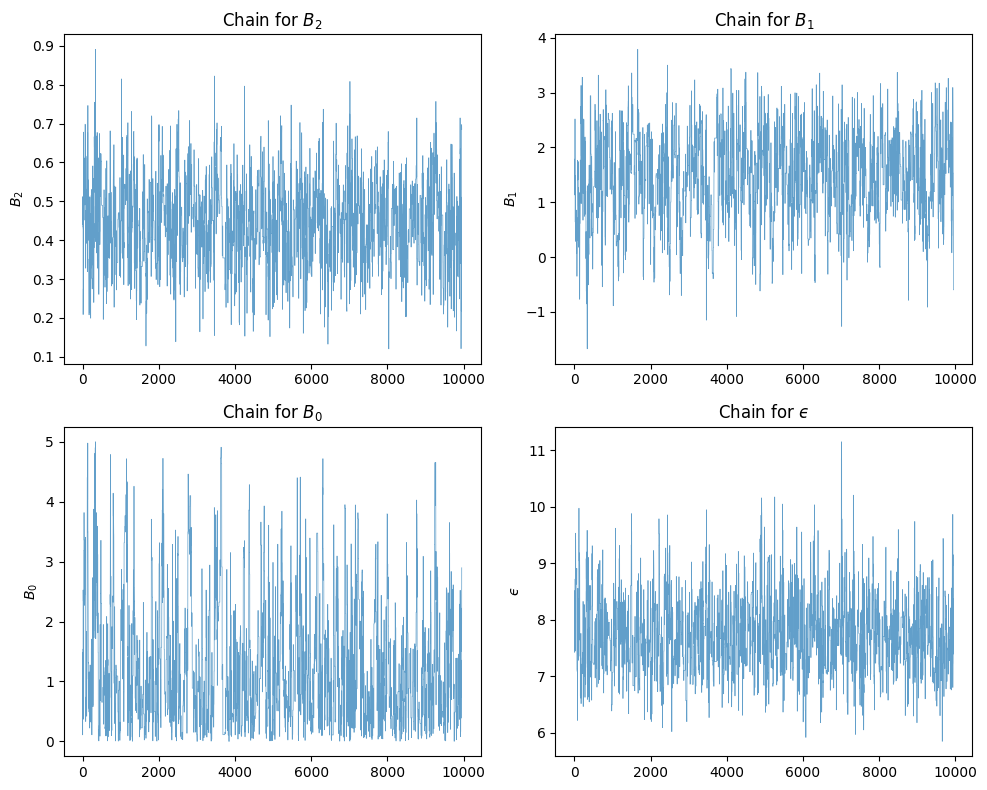

<ipython-input-19-23aef59121dd>:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Add legend to show frequentist line


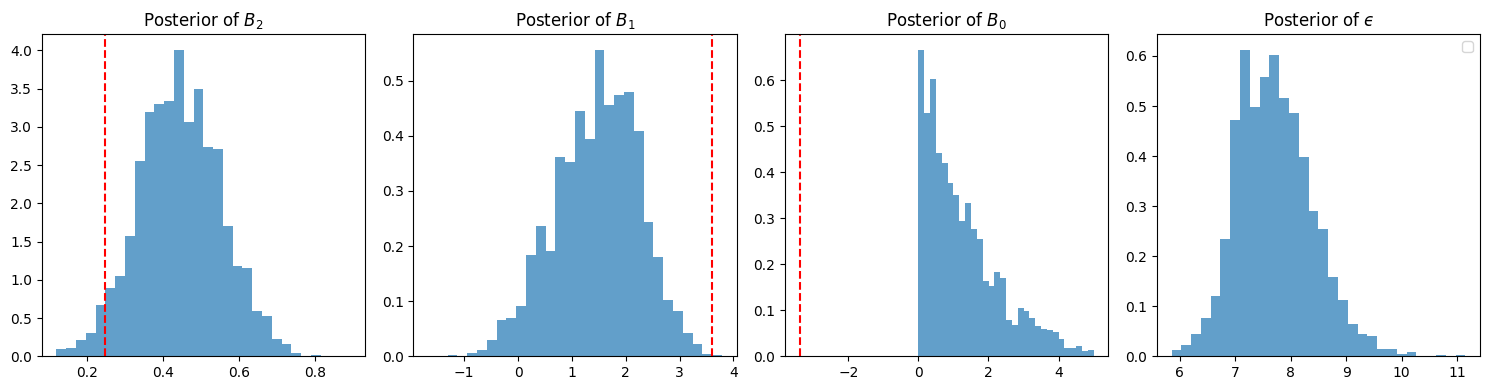

In [ ]:
# Plot MCMC chains
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
labels = ['$B_2$', '$B_1$', '$B_0$', '$ϵ$']
for i, ax in enumerate(axes.flatten()):
    ax.plot(samples[:, i], alpha=0.7, linewidth=0.5)
    ax.set_title(f'Chain for {labels[i]}')
    ax.set_ylabel(labels[i])

plt.tight_layout()
plt.show()

# Visualizing posterior distributions
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
labels = ['$B_2$', '$B_1$', '$B_0$', '$ϵ$']  # Parameter labels

# Assuming b2, b1, b0 are calculated earlier (in the frequentist model section)
frequentist_coeffs = [b2, b1, b0]

for i, ax in enumerate(axes):
    ax.hist(samples[:, i], bins=30, density=True, alpha=0.7)
    ax.set_title(f'Posterior of {labels[i]}')

    # Overlay vertical red line for frequentist coefficients (if applicable)
    if i < len(frequentist_coeffs):  # Only for a, b, c
        ax.axvline(frequentist_coeffs[i], color='red', linestyle='--', label='Frequentist')

plt.tight_layout()
plt.legend()  # Add legend to show frequentist line
plt.show()

## A cautionary Note

In this example we apply the *Metropolis-Hastings* (MH) algorithm, which is the simplest possible and most versatile MCMC sampler. The MH-MCMC works perfectly fine for models with a small number of parameters, with unimodal posterior distributions, and where mixing is not a concern. Bear in mind that the MH-MCMC isn’t practical for many problems and there is a pletora of dedicated software (e.g. packages in Python) for high-dimensional problems involving complex, multimodal distributions.

---

**_Aside_**: Let's re-run the model using a smaller (e.g. 0.1) and a larger (e.g. 2.5) step_size argument, respectively. Looking at the MCMC chains, how does the quality of the mixing change? When do the chains look "hairy" and when do they look "sticky"?

---

## 8. Plot the Bayesian Model Fit

It's time to fit the data with the newly generated Bayesian model and associated uncertainties. We first need to extract the MCMC samples and calculate the 95% credibility bands, which is the Bayesian equivalent of confidence intervals.

In [ ]:
# Extract Posterior Samples
a_samples = samples[:, 0]
b_samples = samples[:, 1]
c_samples = samples[:, 2]

# Generate Predictions
x_range = np.linspace(min(av_temp), max(av_temp), 100)  # Range of x-values for predictions
num_samples = len(a_samples)  # Number of posterior samples
predictions = np.zeros((num_samples, len(x_range)))  # Store predictions for each sample

for i in range(num_samples):
    predictions[i] = a_samples[i] * (x_range ** 2) + b_samples[i] * x_range + c_samples[i]

# Calculate Credibility Intervals (e.g., 95%)
lower_bound = np.percentile(predictions, 5, axis=0)  # 5th percentile for lower bound
upper_bound = np.percentile(predictions, 95, axis=0)  # 95th percentile for upper bound
mean_prediction = np.mean(predictions, axis=0)  # Mean prediction

Lastly, we plot the raw data and our Bayesian model fit.

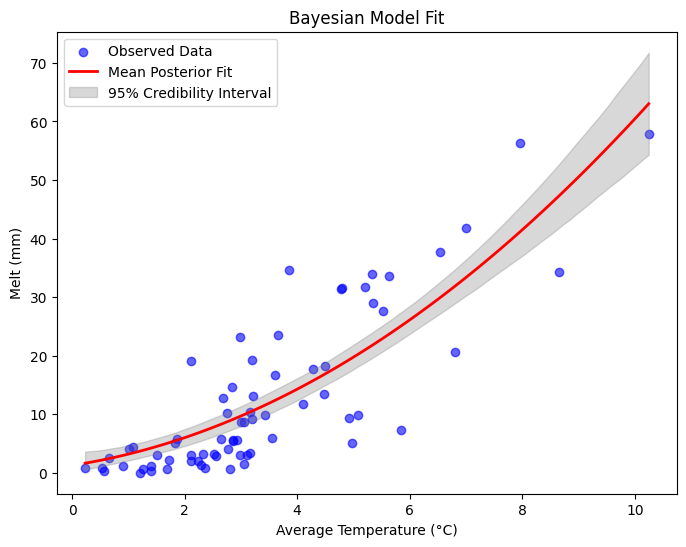

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(av_temp, melt, color="blue", alpha=0.6, label="Observed Data")
plt.plot(x_range, mean_prediction, color="red", linewidth=2, label="Mean Posterior Fit")
plt.fill_between(x_range, lower_bound, upper_bound, color="gray", alpha=0.3, label="95% Credibility Interval")
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Melt (mm)')
plt.legend()
plt.title("Bayesian Model Fit")
plt.show()

## Some considerations

Note that, unlike the frequentist approach, the Bayesian model doesn't yield negative melting even when accounting for the credibility bands. Bear in mind that this is still a rather simplistic model, and that a quadratic fit may not be perfectly suited to predict melting, so I would recommend that you consider alternative nonlinear models.

## Measurement Errors

So far we have implemented a framework that deals only with the intrinsic error of the model (i.e. $σ^2$), that is the uncertainty in the model's prediction. This is generally determined by noise in the relationship between the predictors $x$ and the response $y$, or other unexplained variability in the data that your model doesn't capture. But what if our measurements come with a substantial analytical error? In that case, we should take these errors into account when desigining our Bayesian model.

Factoring in both the intrinsic noise in the data and the measurement errors is straighforward. In fact, the total variance of the observed data in your model is the sum of two components: 1. the *Model Error* $σ^2$, and 2. the *Measurement Error* $τ^2$. The latter represents the error in the observed data due to uncertainties in the measurement process. Because the model error and the measurement error are independent, the variances of the errors add together, and the total variance of the observed variable $y_{obs}$ can thus be denoted as:

$$
Var(y_{obs}) ​= σ^2+τ^2
$$

Let's now assume that the melt measurements come with an error of 5%. We can easily modify the `likelihood` function to include the measurement error and calculate the total variance as follows:

In [ ]:
def likelihood(x, y, params):
    a, b, c, sigma = params
    pred = a * (x ** 2) + b * x + c  # Model prediction

    # Calculate measurement error based on 5% of the predicted value
    measurement_error = 0.05 * pred

    # Total variance is the sum of model variance and measurement error variance
    total_variance = sigma**2 + measurement_error**2

    # Calculate the log-likelihood with total variance
    residuals = y - pred
    log_likelihood = -0.5 * np.sum((residuals**2 / total_variance) + np.log(2 * np.pi * total_variance))

    return log_likelihood

---
## **What Have We Learned Today?**

- **Bayesian Analysis**

Bayesian statistics is a way of updating our beliefs based on new evidence. It is particularly useful for scientific problems involving small or noisy data sets. A key advantage of Bayesian statistics over frequentist methods is its ability to incorporate physical limits into statistical models, leading to more realistic results.

- **Markov Chain Monte Carlo (MCMC)**

MCMC sampling provides a class of algorithms for systematic random sampling from high-dimensional probability distributions. In Bayesian Analysis, MCMC allows for parameter estimation and exploration of the posterior distribution.

Unlike Monte Carlo sampling methods that are able to draw independent samples from the distribution, MCMC methods draw samples where the next sample is dependent on the present sample, called a Markov Chain. This allows the algorithms to narrow in on the quantity that is being approximated from the distribution, even with a large number of random variables.

---


---

### **Suggested References**:

- Kruschke, J.K., 2010. Bayesian data analysis. Wiley Interdisciplinary Reviews: Cognitive Science, 1(5), pp.658-676.

- Martin, O.A., Kumar, R. and Lao, J., 2021. Bayesian modeling and computation in Python. Chapman and Hall/CRC.

- Min, S.K., Simonis, D. and Hense, A., 2007. Probabilistic climate change predictions applying Bayesian model averaging. Philosophical Transactions of the Royal Society A: Mathematical, Physical and Engineering Sciences, 365(1857), pp.2103-2116.

---

### **Online Resources**

For a great tutorial on MCMC in Bayesian Stats check out this [blog post](https://blog.stata.com/2016/11/15/introduction-to-bayesian-statistics-part-2-mcmc-and-the-metropolis-hastings-algorithm/).

This is a useful [tutorial](https://statsthinking21.github.io/statsthinking21-python/10-BayesianStatistics.html#) that provides an introduction to Bayesian Statistics in Python.

For the paleo-geeks: this is a cool [tutorial](https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial_Solution.html) showing an application of MCMC to fit Milankovitch cycles to ice core data.


---